# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Implementing a Machine Learning algorithm (The Relevance Vector Machine) 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a machine learning algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.

In this case, we are going to use the relevance vector machine. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different to more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advanatage of classical machine learning is the need of much less information than deep learning algorithms.

Let's start importing the csv files generated in Step 1:

In [12]:
import pandas as pd
sm_data_may_13 = pd.read_csv('./Results Step 1/landsat7_may_13_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_may_13.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,900,756,3735,1908,2955,879,0_0,642
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,900,807,3666,2039,2960,1044,1_0,667
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,1070,862,3416,1938,2965,976,2_0,751


In [13]:
import pandas as pd
sm_data_may_29 = pd.read_csv('./Results Step 1/landsat7_may_29_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_may_29.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,612,452,4921,1824,2980,742,0_0,369
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,693,525,4617,1921,2985,904,1_0,394
2,29.27,105A,0.65,28.20,26.10,corn,0.24,0.07,0.50,0.56,...,5,3.73,2158,2542,3257,3850,3081,3225,4_0,1646


In [14]:
import pandas as pd
sm_data_jun_14 = pd.read_csv('./Results Step 1/landsat7_jun_14_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_jun_14.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,1343,1434,3716,3115,3077,1896,0_0,939
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,1317,1458,3716,3083,3081,1928,1_0,915
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,973,999,3308,1728,3005,1041,2_0,655


In [15]:
import pandas as pd
sm_data_jun_30 = pd.read_csv('./Results Step 1/landsat7_jun_30_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_jun_30.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,1132,1196,3864,2742,3067,1571,0_0,731
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,1132,1171,3966,2645,3072,1472,1_0,731
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,1264,1680,3217,2288,3118,1472,2_0,803


Let's extract the inputs and outputs

In [16]:
landsat7_may_13_sm_pixels=sm_data_may_13[['B1','B2','B3','B4','B5','B6','B7','SM0513']]
landsat7_may_29_sm_pixels=sm_data_may_29[['B1','B2','B3','B4','B5','B6','B7','SM0529']]
landsat7_jun_14_sm_pixels=sm_data_jun_14[['B1','B2','B3','B4','B5','B6','B7','SM0614']]
landsat7_jun_30_sm_pixels=sm_data_jun_30[['B1','B2','B3','B4','B5','B6','B7','SM0630']]

landsat7_may_29_sm_pixels.head(3)

,B1,B2,B3,B4,B5,B6,B7,SM0529
0,369,612,452,4921,1824,2980,742,0.14
1,394,693,525,4617,1921,2985,904,0.15
2,1646,2158,2542,3257,3850,3081,3225,0.24


The columns B1 to B7 are scaled based on Landsat metadata. https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LE07_C01_T1_SR#bands

Let's rescale them.

In [17]:
landsat7_may_13_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_may_13_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_may_13_sm_pixels[['B6']] =landsat7_may_13_sm_pixels[['B6']].multiply(0.1, axis="index")

landsat7_may_29_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_may_29_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_may_29_sm_pixels[['B6']] =landsat7_may_29_sm_pixels[['B6']].multiply(0.1, axis="index")

landsat7_jun_14_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_jun_14_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_jun_14_sm_pixels[['B6']] =landsat7_jun_14_sm_pixels[['B6']].multiply(0.1, axis="index")

landsat7_jun_30_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_jun_30_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_jun_30_sm_pixels[['B6']] =landsat7_jun_30_sm_pixels[['B6']].multiply(0.1, axis="index")

landsat7_may_29_sm_pixels.head(3)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,B1,B2,B3,B4,B5,B6,B7,SM0529
0,0.0369,0.0612,0.0452,0.4921,0.1824,298.0,0.0742,0.14
1,0.0394,0.0693,0.0525,0.4617,0.1921,298.5,0.0904,0.15
2,0.1646,0.2158,0.2542,0.3257,0.3850,308.1,0.3225,0.24


Now let's merge them all

In [18]:
sm_data_may_13 = landsat7_may_13_sm_pixels.rename({'SM0513': 'SM'}, axis=1)

sm_data_may_29 = landsat7_may_29_sm_pixels.rename({'SM0529': 'SM'}, axis=1)

sm_data_jun_14 = landsat7_jun_14_sm_pixels.rename({'SM0614': 'SM'}, axis=1)

sm_data_jun_30 = landsat7_jun_30_sm_pixels.rename({'SM0630': 'SM'}, axis=1)

sm_data_jun_30.head(3)

,B1,B2,B3,B4,B5,B6,B7,SM
0,0.0731,0.1132,0.1196,0.3864,0.2742,306.7,0.1571,0.13
1,0.0731,0.1132,0.1171,0.3966,0.2645,307.2,0.1472,0.13
2,0.0803,0.1264,0.1680,0.3217,0.2288,311.8,0.1472,0.08


In [19]:
sm=pd.concat([sm_data_may_13,sm_data_may_29])
sm=pd.concat([sm,sm_data_jun_14])
sm=pd.concat([sm,sm_data_jun_30])

sm

,B1,B2,B3,B4,B5,B6,B7,SM
0,0.0642,0.0900,0.0756,0.3735,0.1908,295.5,0.0879,0.39
1,0.0667,0.0900,0.0807,0.3666,0.2039,296.0,0.1044,0.32
2,0.0751,0.1070,0.0862,0.3416,0.1938,296.5,0.0976,0.50
3,0.0800,0.1043,0.0886,0.3485,0.1938,297.0,0.0976,0.47
4,0.1319,0.1670,0.2001,0.2589,0.3233,313.6,0.2846,0.07
...,...,...,...,...,...,...,...,...
15,0.0443,0.0786,0.0539,0.5458,0.2191,303.9,0.0978,0.17
16,0.0780,0.1132,0.1269,0.4374,0.3034,311.4,0.1736,0.11
17,0.0851,0.1291,0.1414,0.4510,0.3293,311.8,0.1868,0.08
18,0.0491,0.0786,0.0661,0.4679,0.2029,303.9,0.0912,0.16


Text(0.5, 1.0, 'SM vs SW2')

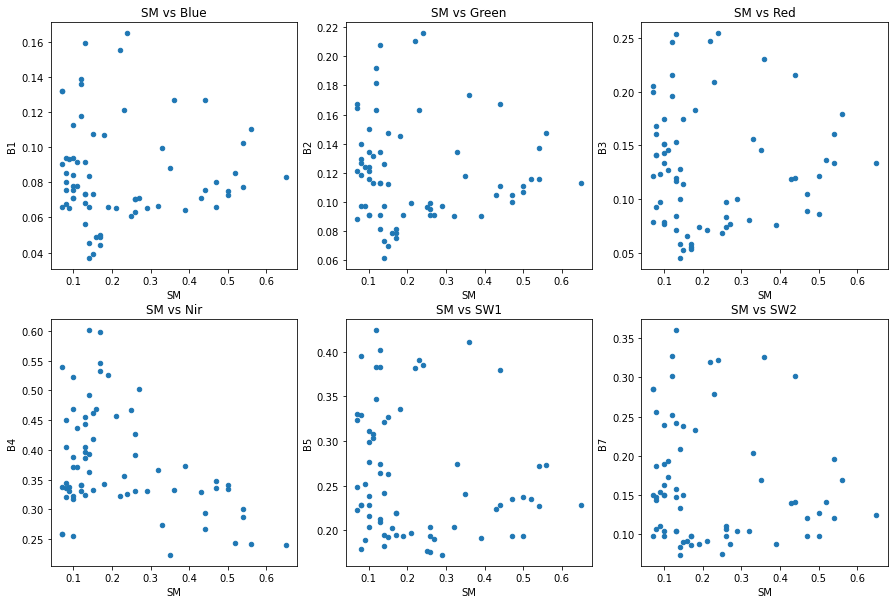

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

sm.plot(ax=axes[0,0],x ='SM', y='B1', kind = 'scatter'); axes[0,0].set_title('SM vs Blue')
sm.plot(ax=axes[0,1],x ='SM', y='B2', kind = 'scatter'); axes[0,1].set_title('SM vs Green')
sm.plot(ax=axes[0,2],x ='SM', y='B3', kind = 'scatter'); axes[0,2].set_title('SM vs Red')
sm.plot(ax=axes[1,0],x ='SM', y='B4', kind = 'scatter'); axes[1,0].set_title('SM vs Nir')
sm.plot(ax=axes[1,1],x ='SM', y='B5', kind = 'scatter'); axes[1,1].set_title('SM vs SW1')
sm.plot(ax=axes[1,2],x ='SM', y='B7', kind = 'scatter'); axes[1,2].set_title('SM vs SW2')

In the figure above, let's look for patterns (e.g. a linear trend). Which bands relate more to SM?. Let's look at the thermal information too.

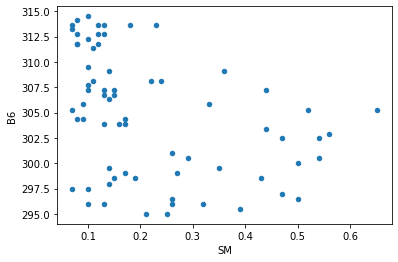

In [21]:
sm.plot(x ='SM', y='B6', kind = 'scatter'); #axes[2,2].set_title('SM vs Temp')


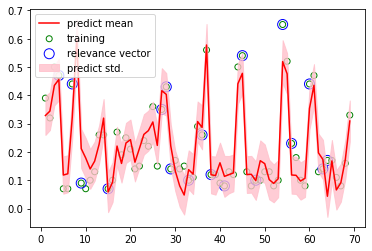

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_rvm import EMRVR

X=sm[['B1','B2','B3','B4','B5','B6','B7']].to_numpy()
y_=sm['SM'].to_numpy()

xl = np.linspace(1, len(y), len(y))
x_train = X
y_train = y_

model = EMRVR(kernel='rbf', gamma='auto',bias_used=True)
model.fit(x_train, y_train)

y, y_std = model.predict(X, return_std=True)

plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.8, label='predict std.')
plt.legend(loc='best')
plt.show()

In [34]:
import numpy as np 
from sklearn.metrics import r2_score


gamma = np.arange(0.1, 0.9+0.1, 0.1) 
gamma

l = []
for val in gamma:
    model = EMRVR(kernel='rbf', gamma='auto',bias_used=True)
    model.fit(x_train, y_train)
    y = model.predict(X, return_std=False)
    r2= r2_score(y_train, y)
    l=l.append(r2)

l

AttributeError: 'NoneType' object has no attribute 'append'

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        EMRVR(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



ValueError: continuous is not supported